# Create Manual Plots for Project

## Plot: GTE-Qwen2-7B and llama-Llama-3.1-8B performance across different context sizes

In [14]:
import re

output_path_context = "../EHRSHOT_ASSETS/figures/performance_context_sizes.png"

# Process data
qwen_data = "0.672 (0.648 - 0.696), 0.672 (0.648 - 0.696), 0.767 (0.742 - 0.793), 0.774 (0.749 - 0.799), 0.743 (0.716 - 0.770)"
llama_data = "0.627 (0.603 - 0.651), 0.627 (0.603 - 0.651), 0.722 (0.697 - 0.748), 0.742 (0.714 - 0.769), 0.698 (0.671 - 0.725)"

# Context sizes and performance data
context_sizes = [512, 1024, 2048, 4096, 8192]

def parse_data_string(data):
    # Extract means, lower, and upper using regex
    matches = re.findall(r"([\d.]+) \(([\d.]+) - ([\d.]+)\)", data)

    # Separate into lists
    means = [float(match[0]) for match in matches]
    lower = [float(match[1]) for match in matches]
    upper = [float(match[2]) for match in matches]
    return means, lower, upper

gte_means, gte_lower, gte_upper = parse_data_string(qwen_data)
llama_means, llama_lower, llama_upper = parse_data_string(llama_data)

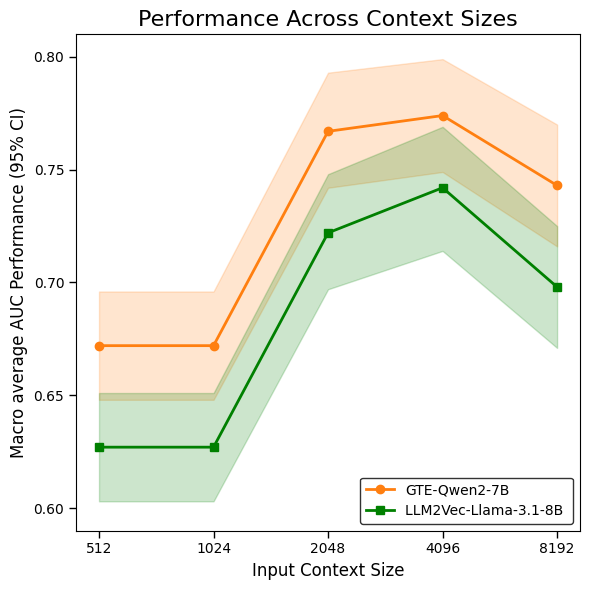

In [15]:
import matplotlib.pyplot as plt
import numpy as np  

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))  # Match size (6x6)

# Title and axis labels
ax.set_title("Performance Across Context Sizes", fontsize=16)
ax.set_xlabel("Input Context Size", fontsize=12)
ax.set_ylabel("Macro average AUC Performance (95% CI)", fontsize=12)  # Updated y-axis label

# Set x and y scales and ticks
ax.set_xscale("log")  # Log scale for x-axis
ax.set_xticks(context_sizes)  # Use only context_sizes for x-axis ticks
ax.set_xticklabels(context_sizes, fontsize=10)  # Labels for x-axis ticks
ax.tick_params(axis="x", which="both", bottom=True, top=False, length=5, width=1)  # Uniform tick size for x-axis
ax.tick_params(axis="x", which="minor", bottom=False)  # Remove minor ticks on the x-axis
ax.set_yticks(np.arange(0.6, 0.8 + 0.05, 0.05))  # y-axis from 0.5 to 0.85 with steps of 0.05
ax.set_ylim(0.59, 0.81)  # Set y-axis limits
ax.tick_params(axis="y", which="both", length=5, width=1)  # Uniform tick size for y-axis

# Plot GTE-Qwen2-7B with confidence interval (dark orange)
dark_orange = "#FF7F10"  # Dark orange color
ax.plot(context_sizes, gte_means, label="GTE-Qwen2-7B", marker="o", linestyle="-", linewidth=2, color=dark_orange)
ax.fill_between(context_sizes, gte_lower, gte_upper, color=dark_orange, alpha=0.2)

# Plot llama-Llama-3.1-8B with confidence interval (green)
ax.plot(context_sizes, llama_means, label="LLM2Vec-Llama-3.1-8B ", marker="s", linestyle="-", linewidth=2, color="green")
ax.fill_between(context_sizes, llama_lower, llama_upper, color="green", alpha=0.2)

# Add legend in lower right corner inside the plot with a frame
legend = ax.legend(loc="lower right", fontsize=10, frameon=True, edgecolor="black")

# Adjust layout for better spacing
plt.tight_layout()

# Save or display the plot
plt.savefig(output_path_context, dpi=300)  # Save with high DPI
plt.show()

## Scaling Behavior

In [17]:
# Define the models and their attributes

output_path_scaling = "../EHRSHOT_ASSETS/figures/performance_scaling.png"

models = [
    {"name": "CLIMBR-T-Base", "million_parameters": 141, "performance": (0.746, 0.769, 0.792), "color": "#1F78B4", "marker": "o"},
    {"name": "GTE-Qwen2-7B", "million_parameters": 7000, "performance": (0.749, 0.774, 0.799), "color": "#FF7F10", "marker": "s"},
    {"name": "LLM2Vec-Llama-3.1-8B", "million_parameters": 8000, "performance": (0.714, 0.742, 0.769), "color": "#2CA02C", "marker": "^"},
    {"name": "GTE-Qwen2-1.5B", "million_parameters": 1500, "performance": (0.732, 0.757, 0.783), "color": "#D62728", "marker": "D"},
    {"name": "LLM2Vec-Llama-2-1.3B", "million_parameters": 1300, "performance": (0.684, 0.712, 0.749), "color": "#9467BD", "marker": "v"},
    {"name": "DeBERTaV3-large (mean)", "million_parameters": 434, "performance": (0.657, 0.694, 0.716), "color": "#8C564B", "marker": "p"},
    {"name": "DeBERTaV3-base (mean)", "million_parameters": 183, "performance": (0.657, 0.686, 0.716), "color": "#E377C2", "marker": "H"},
    {"name": "Bio_ClinicalBERT (mean)", "million_parameters": 110, "performance": (0.682, 0.709, 0.736), "color": "#7F7F7F", "marker": "X"}
]


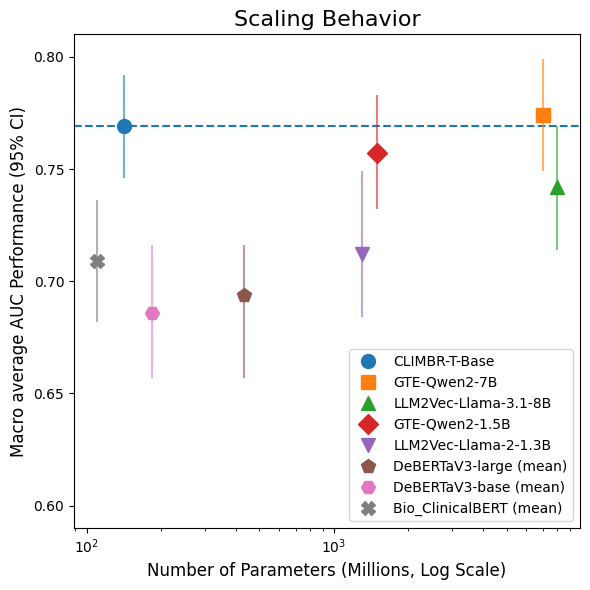

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Title and axis labels
ax.set_title("Scaling Behavior", fontsize=16)
ax.set_xlabel("Number of Parameters (Millions, Log Scale)", fontsize=12)
ax.set_ylabel("Macro average AUC Performance (95% CI)", fontsize=12)

# Set x and y scales and ticks
ax.set_xscale("log")
ax.set_ylim(0.59, 0.81)
ax.set_yticks(np.arange(0.60, 0.80, 0.05))

# Add a horizontal line at the performance of CLIMBR-T-Base
climbr_mean_performance = models[0]["performance"][1]
ax.axhline(y=climbr_mean_performance, color=models[0]["color"], linestyle='--', linewidth=1.5)

# Plot data points with confidence intervals
for model in models:
    x = model["million_parameters"]
    mean = model["performance"][1]
    lower = model["performance"][0]
    upper = model["performance"][2]
    color = model["color"]
    marker = model["marker"]

    ax.plot(x, mean, marker=marker, label=model["name"], color=color, linestyle='None', markersize=10)  # Larger symbols
    ax.vlines(x, lower, upper, color=color, alpha=0.6)

# Add legend
ax.legend(loc="lower right", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Save or display the plot
plt.savefig(output_path_scaling, dpi=300)  # Save with high DPI
plt.show()